# Regresión Lineal Simple

La `Regresión Lineal Simple` es una técnica estadística utilizada para modelar la relación entre dos variables: una variable dependiente (o respuesta) y una variable independiente (o explicativa). El objetivo es encontrar una línea que mejor ajuste los datos, minimizando la distancia entre los puntos observados y la línea estimada.

### Analisis por pareja de variables númericas las relaciones usando un gráfico de dispersión

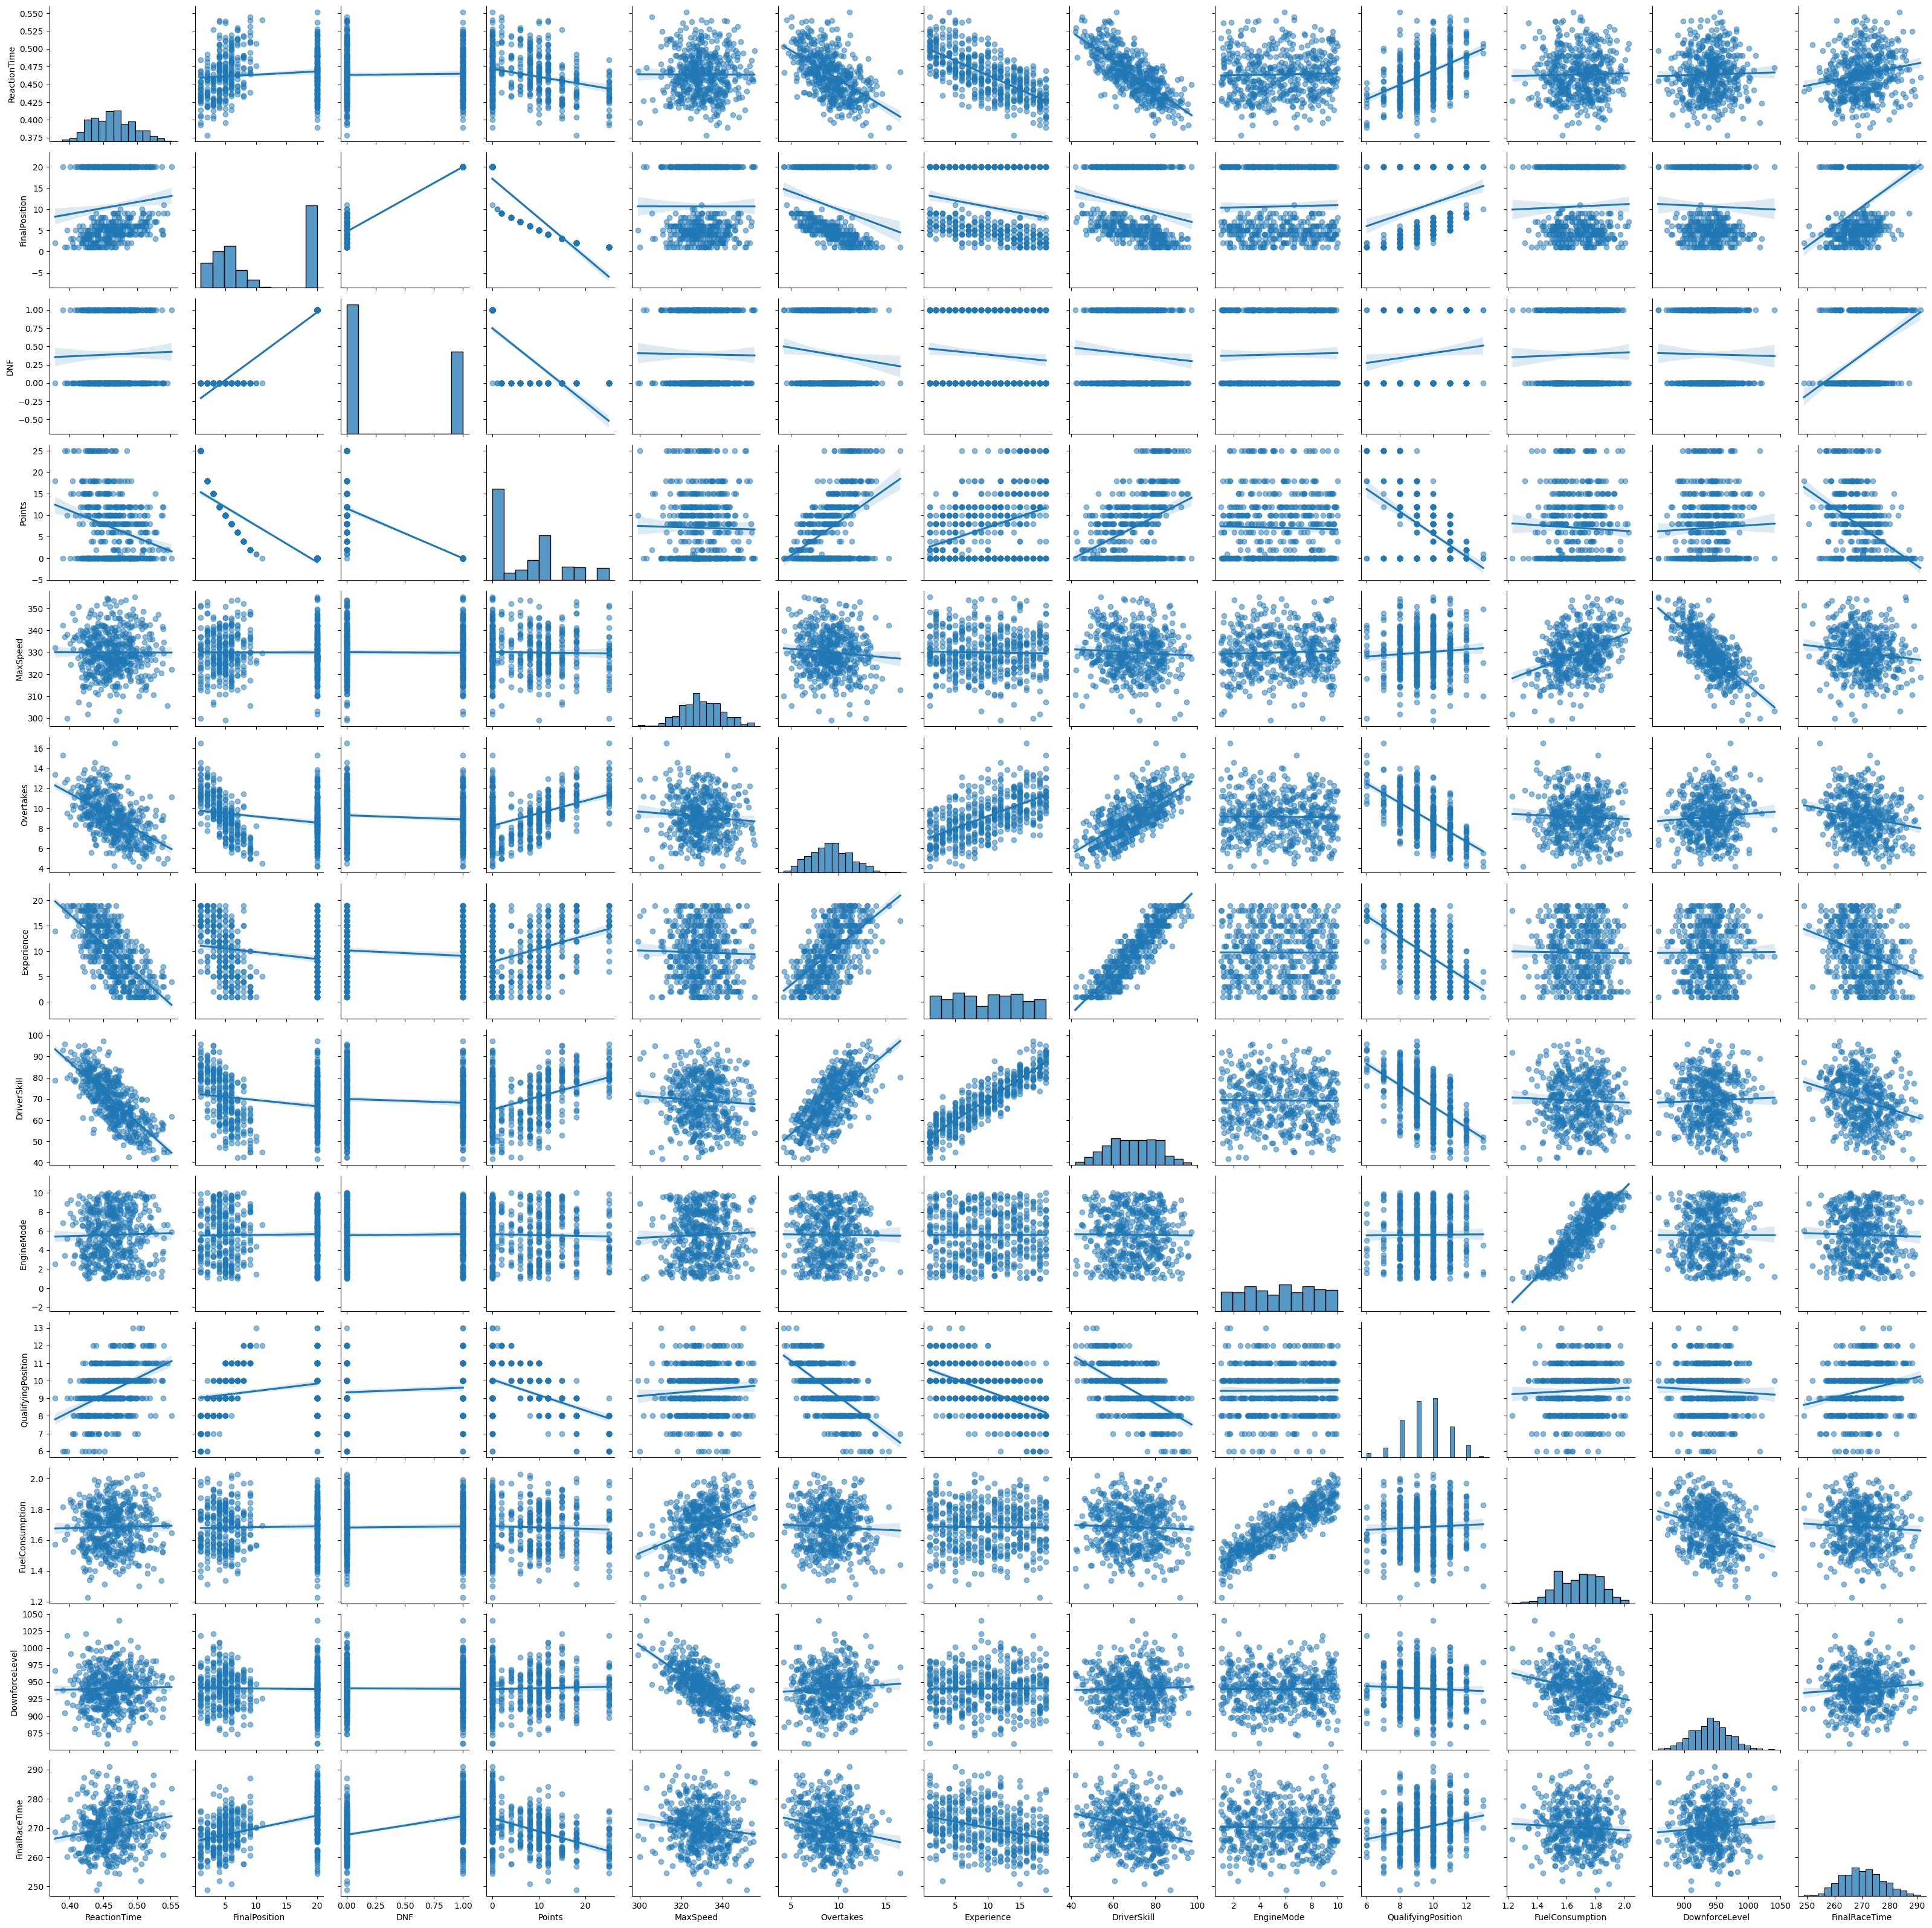

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import norm 
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns

f1 = pd.read_csv('formula1_enhanced_data_final.csv')


numeric_columns = f1.select_dtypes(include=['number'])

columns_to_exclude = ['Age', 'PitStopTime', 'TrackFamiliarity', 'TyreWear', 'CarPerformance']

# Filtrar columnas numéricas excluyendo las especificadas
numeric_columns_filtered = numeric_columns.drop(columns=columns_to_exclude, axis=1)

# Crear la matriz de gráficos con regresiones
sns.pairplot(numeric_columns_filtered, kind="reg", plot_kws={'scatter_kws': {'alpha': 0.5}})

# Mostrar el gráfico
plt.show()

### Relación entre Velocidad Máxima y el nivel de carga aerodinámica

- El `DownForce Level` (nivel de carga aerodinámica) es una medida que indica cuánta fuerza vertical es generada por el alerón, la parte inferior del vehículo y otros componentes aerodinámicos para mantener el coche pegado al suelo durante una carrera, especialmente en circuitos con curvas rápidas. Cuanto más alto sea el nivel de downforce, más fuerte será la fuerza de sujeción que empuja el coche hacia el asfalto, permitiendo que el coche mantenga mejor su tracción en las curvas

Ahora establezcamo nuestro modelo de regresión lineal simple entre nuestras variables considerando a nuestra variable `MaxSpeed` como la independiente:


Equation of the line: MaxSpeed = 329.96 + (-7.17 * DownforceLevel)

R-squared: 0.4870


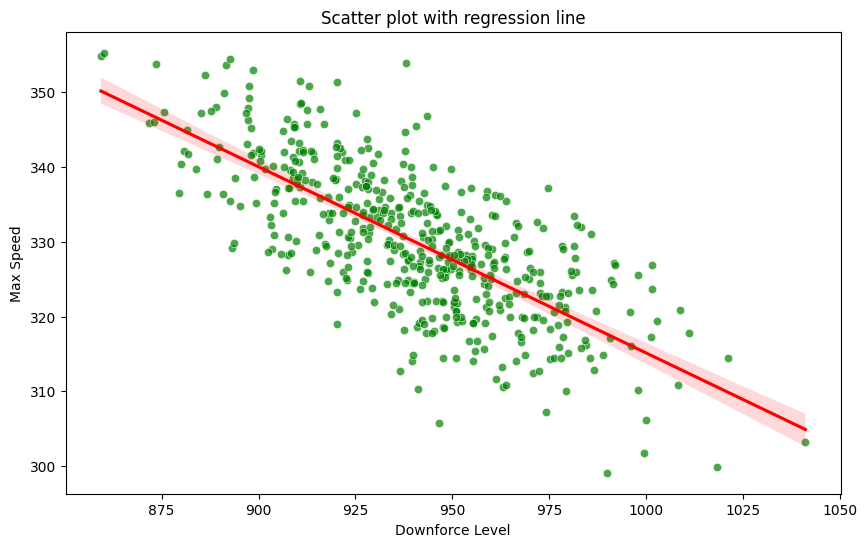

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Cargar el dataset (asegúrate de tener el archivo CSV en la misma carpeta o proporciona la ruta correcta)
data = pd.read_csv('formula1_enhanced_data_final.csv')

# Filtrar las columnas relevantes
features = ['DownforceLevel']  # Variable independiente
target = 'MaxSpeed'  # Variable dependiente

# Filtrar filas con valores nulos
data = data.dropna(subset=features + [target])

# Definir las variables X (independiente) e y (dependiente)
X = data[features]
y = data[target]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Coeficientes y ecuación de la recta
coefficients = model.coef_
intercept = model.intercept_

# Imprimir la ecuación de la recta
equation = f"MaxSpeed = {intercept:.2f} + ({coefficients[0]:.2f} * DownforceLevel)"
print("\nEquation of the line:", equation)

# Calcular el R²
r_squared = model.score(X_test_scaled, y_test)
print(f"\nR-squared: {r_squared:.4f}")


# Crear un gráfico de dispersión adicional para la relación entre Downforce Level y Max Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['DownforceLevel'], y=data['MaxSpeed'], alpha=0.7, color='green')
sns.regplot(x=data['DownforceLevel'], y=data['MaxSpeed'], scatter=False, color='red')
plt.xlabel('Downforce Level')
plt.ylabel('Max Speed')
plt.title('Scatter plot with regression line')
plt.show()


**Qué muestra:**

- **Puntos verdes**:  Cada punto representa un par de datos de `DownforceLevel` (nivel de carga aerodinámica) y `MaxSpeed` (velocidad máxima). La línea roja es la recta de regresión ajustada, que muestra la relación lineal entre las dos variables.


- **Ecuación de la recta de regresión** : 
$MaxSpeed = 329.96 + (-7.17 * DownforceLevel)$

Coeficiente de DownforceLevel (-7.17): Cada aumento de una unidad en el DownforceLevel reduce la MaxSpeed en 7.17 unidades. Esta relación sugiere que a mayor carga aerodinámica, la velocidad máxima disminuye.


- **R-squared**: El R-squared es una medida de ajuste del modelo. En este caso, R² = 0.4870 significa que el 48.70% de la variabilidad en la MaxSpeed es explicada por el DownforceLevel.

# Regresión Lineal Múltiple

### Relacion entre la experiencia , las condiciones de la pista , el compuesto de los neumaticos y el tiempo final

En una regresión lineal múltiple, la relación se expresa mediante una ecuación lineal que incluye un término de intersección y los coeficientes de cada variable independiente. Estos coeficientes representan la influencia de cada variable en la variable dependiente. El modelo busca ajustar los coeficientes de manera que minimice el error cuadrático medio entre las predicciones y los valores observados.

Los principales métodos utilizados en la regresión lineal múltiple incluyen:

- `Ajuste de parámetros por Mínimos Cuadrados Ordinarios (OLS)`: Este método encuentra los coeficientes del modelo minimizando la suma de los cuadrados de los errores (diferencias entre los valores observados y los predichos).

- `Evaluación del modelo`: Una vez ajustado el modelo, se evalúa su precisión utilizando métricas como el coeficiente de determinación R², que indica la proporción de la varianza de la variable dependiente explicada por las variables independientes.


Se seleccionan las características más relevantes como `DriverSkill`, `Experience` y `Overtakes` para usarlas como variables independientes. El objetivo es predecir el `ReactionTime`, que es la variable dependiente. 

El conjunto de datos se divide en dos partes: entrenamiento (80%) y prueba (20%). Esto permite entrenar el modelo con una parte de los datos y evaluarlo con los datos que no se usaron en el entrenamiento.

Primero tomemos para un piloto en particular : `Lewis Hamilton`.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import io
from urllib.request import urlopen


data = pd.read_csv("formula1_enhanced_data_final.csv")


# Print column names
print("Available columns:")
print(data.columns.tolist())

# Select a specific driver (for example, let's use 'Hamilton')
driver_name = 'Hamilton'
driver_data = data[data['Driver'] == driver_name].copy()
sm
if driver_data.empty:
    print(f"No data found for driver {driver_name}")
    print("Available drivers:")
    print(data['Driver'].unique())
    exit()

print(f"\nAnalyzing data for driver: {driver_name}")
print(f"Number of races: {len(driver_data)}")

# Select relevant features
features = ['DriverSkill', 'Experience', 'Overtakes']
target = 'ReactionTime'

# Check if columns exist and remove those that don't
features = [f for f in features if f in data.columns]
if target not in data.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset")

print(f"\nUsing features: {features}")
print(f"Target: {target}")
for feature in features:
    driver_data[feature] = pd.to_numeric(driver_data[feature], errors='coerce')
driver_data = driver_data.dropna(subset=features + [target])

# Split the data for the selected driver (only Hamilton's data)
X = driver_data[features]
y = driver_data[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Print the equation of the hyperplane
coefficients = model.coef_
intercept = model.intercept_

print("\nEquation of the hyperplane:")
equation = f"ReactionTime = {intercept:.2f}"
for feature, coef in zip(features, coefficients):
    equation += f" + ({coef:.2f} * {feature})"
print(equation)

# Calculate R-squared
r_squared = model.score(X_test_scaled, y_test)
print(f"\nR-squared: {r_squared:.4f}")




Available columns:
['Date', 'Driver', 'Age', 'Team', 'Circuit', 'PitStopTime', 'ReactionTime', 'FinalPosition', 'DNF', 'Points', 'MaxSpeed', 'Overtakes', 'Experience', 'DriverSkill', 'CarPerformance', 'TrackFamiliarity', 'WeatherCondition', 'TyreCompound', 'EngineMode', 'QualifyingPosition', 'TyreWear', 'FuelConsumption', 'DownforceLevel', 'FinalRaceTime']

Analyzing data for driver: Hamilton
Number of races: 36

Using features: ['DriverSkill', 'Experience', 'Overtakes']
Target: ReactionTime

Equation of the hyperplane:
ReactionTime = 0.46 + (-0.00 * DriverSkill) + (-0.02 * Experience) + (-0.01 * Overtakes)

R-squared: 0.7065


**Interpretación de los Coeficientes:**

- *Intercepto (0.46):*
El intercepto de 0.46 sugiere que cuando todos los factores (habilidad, experiencia y adelantamientos) son cero, el modelo predice un tiempo de reacción base de 0.46 segundos. Aunque este valor no es realista en un contexto práctico, ofrece una referencia en el contexto de la regresión.

- *Coeficiente de DriverSkill (-0.00):*
El coeficiente para habilidad de conducción es extremadamente pequeño (-0.00), lo que indica que la habilidad del piloto tiene un impacto casi nulo en el tiempo de reacción en este modelo. A pesar de que en la práctica la habilidad de un piloto podría influir en su tiempo de reacción, en este conjunto de datos, no parece haber una relación significativa entre estas dos variables.

- *Coeficiente de Experience (-0.02):*
El coeficiente de experiencia es -0.02, lo que indica que, a medida que la experiencia del piloto aumenta, el tiempo de reacción disminuye ligeramente, lo que tiene sentido, ya que los pilotos más experimentados generalmente son más rápidos en sus decisiones. Sin embargo, este impacto es relativamente pequeño en comparación con otras posibles variables.

- *Coeficiente de Overtakes (-0.01):*
El coeficiente de adelantamientos es -0.01, lo que también sugiere que a medida que el número de adelantamientos realizados por el piloto aumenta, el tiempo de reacción disminuye ligeramente. Aunque este impacto es pequeño, puede indicar que un piloto más agresivo (que realiza más adelantamientos) podría estar más acostumbrado a tomar decisiones rápidas durante las carreras.

En este bloque de código, se realizará una visualización exploratoria de las relaciones entre las variables seleccionadas (DriverSkill, Experience, Overtakes) y el tiempo de reacción (ReactionTime) de Lewis Hamilton. A través de gráficos de dispersión y una matriz de correlación, se busca entender cómo estas variables influyen en el rendimiento del piloto y su relación con el tiempo de reacción.

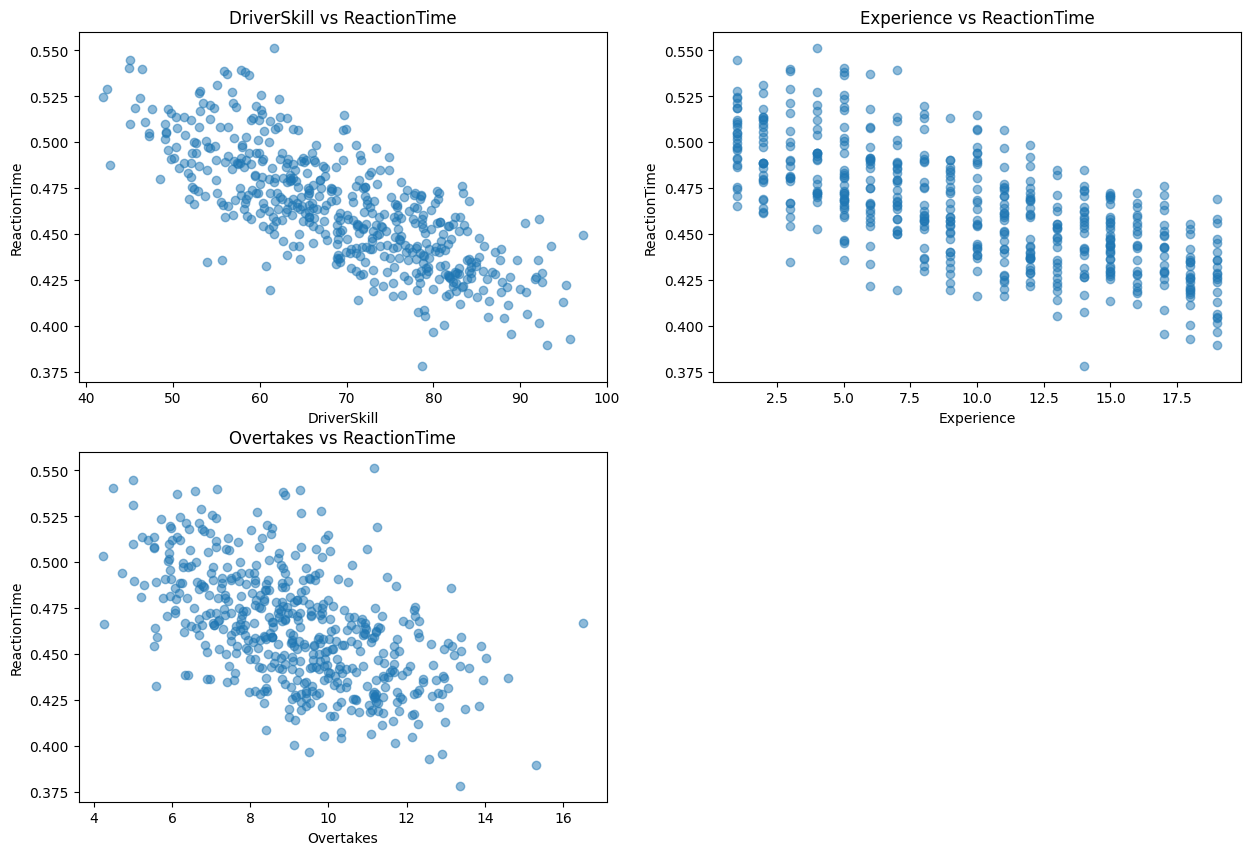

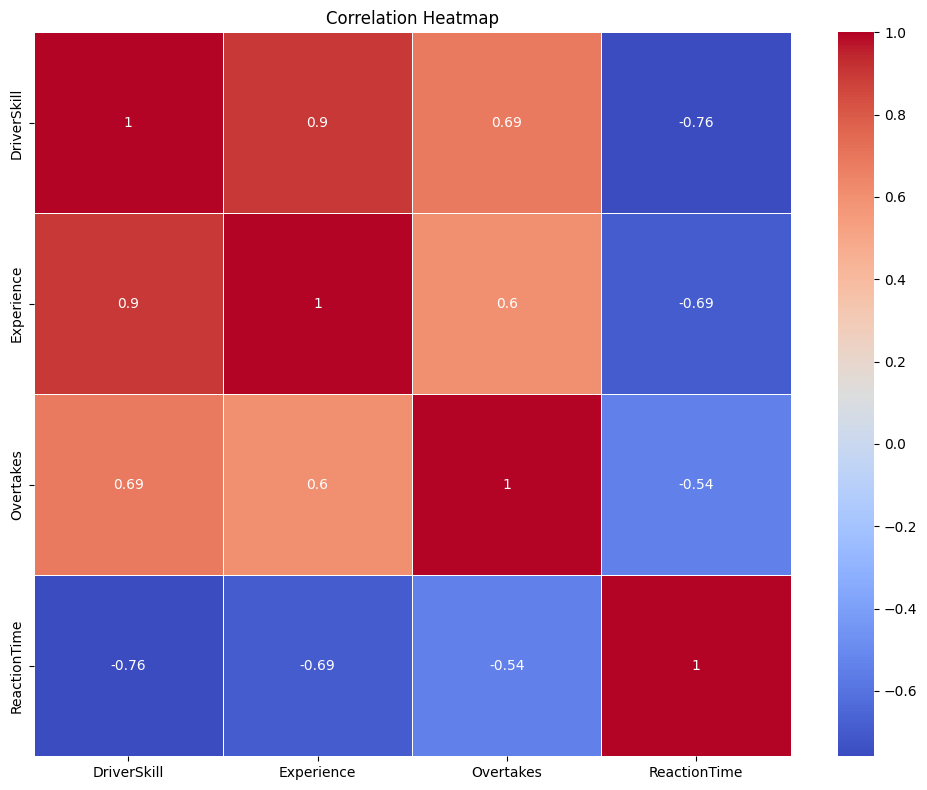


Visualization complete


In [38]:

# Visualize the relationships
plt.figure(figsize=(15, 10))

# Scatter plots for each feature vs FinalRaceTime
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(data[feature], data[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('ReactionTime')
    plt.title(f'{feature} vs ReactionTime')

  


# Heatmap: Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data[features + [target]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

print("\nVisualization complete")

 A continuación vamos ajustar un modelo de regresión lineal múltiple utilizando la librería statsmodels. A través de este proceso, buscamos entender cómo las variables independientes seleccionadas (como DriverSkill, Experience, Overtakes) afectan a la variable dependiente (en este caso, ReactionTime), y cómo el modelo puede predecir el tiempo de reacción en función de estas características. 

In [40]:
for feature in features:
    driver_data[feature] = pd.to_numeric(driver_data[feature], errors='coerce')

# Eliminando las filas con valores faltantes
driver_data = driver_data.dropna(subset=features + [target])

# Definiendo las variables X (independientes) y y (dependiente)
X = driver_data[features]
y = driver_data[target]

# Añadiendo una constante (intercepto) a las variables independientes
X = sm.add_constant(X)

# Ajustando el modelo OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Mostrando el resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           ReactionTime   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     21.24
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           9.32e-08
Time:                        23:27:30   Log-Likelihood:                 95.259
No. Observations:                  36   AIC:                            -182.5
Df Residuals:                      32   BIC:                            -176.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5533      0.033     16.632      

### Summary (Medidas importantes)

- `p-values`:  Indican la significancia estadística de los coeficientes. Si es menor a 0.05, la variable independiente tiene un efecto significativo.

- `R-squared y Adjusted R-squared`: Miden el porcentaje de la variabilidad de la variable dependiente explicada por el modelo. El R² ajustado penaliza modelos con demasiadas variables

- `F-statistic y su p-value`:  Evalúan la significancia global del modelo. Un p-value bajo indica que al menos una variable independiente tiene un impacto significativo.

- `Durbin-Watson`:Detecta la autocorrelación en los residuos. Un valor cercano a 2 indica que no hay autocorrelación, lo cual es ideal. 

Si $e_t$ es el residual asociado a la observación en el tiempo t, entonces el estadístico de la prueba es:

$d= \frac{\sum_{t=2}^T (e_{t}-e_{t-1})^2 }{\sum_{t=1}^T e_{t}^2}$

Donde T es el número de observaciones. Puesto que d es aproximadamente igual a 2(1 − r), donde r es el coeficiente de autocorrelación de primer orden de los residuos,​ d = 2 indica que no hay autocorrelación. El valor de d siempre está entre 0 y 4. Si el estadístico de Durbin-Watson es sustancialmente menor que 2, hay evidencia de correlación serial positiva. Como regla general, si el estadístico de Durbin-Watson es inferior a 1, puede ser causa de alarma.

Para más detalles, puedes consultar la explicación completa de la estadística de Durbin-Watson en el siguiente [enlace](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic).



### Comparativa de Evaluación de Circuitos

Este bloque de código tiene como objetivo evaluar el rendimiento del modelo de regresión lineal múltiple en diferentes circuitos del campeonato de Fórmula 1. Utilizando las características del piloto como habilidad de conducción, experiencia y número de adelantamientos, se realiza un análisis de cómo estas variables afectan al tiempo de reacción en cada circuito.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv("formula1_enhanced_data_final.csv")

# Select relevant features and target
features = ['DriverSkill', 'Experience', 'Overtakes']
target = 'ReactionTime'

# Initialize a dictionary to store R² values for each circuit
circuit_r_squared = {}

# Iterate through unique circuits
for circuit in data['Circuit'].unique():
    circuit_data = data[data['Circuit'] == circuit]
    
    # Check if we have enough data for this circuit
    if len(circuit_data) < 10:  # You might want to adjust this threshold
        print(f"Skipping {circuit} due to insufficient data")
        continue

    # Prepare the data
    X = circuit_data[features]
    y = circuit_data[target]

    # Handle missing values
    X = X.dropna()
    y = y[X.index]

    # Check if we still have enough data after dropping NA values
    if len(X) < 10:
        print(f"Skipping {circuit} due to insufficient data after removing NA values")
        continue

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Calculate R-squared
    r_squared = model.score(X_test_scaled, y_test)
    
    # Store the R² value
    circuit_r_squared[circuit] = r_squared

# Sort circuits by R² value
sorted_circuits = sorted(circuit_r_squared.items(), key=lambda x: x[1], reverse=True)

# Print results
print("\nR² values for each circuit:")
for circuit, r_squared in sorted_circuits:
    print(f"{circuit}: R² = {r_squared:.4f}")

# Calculate and print the average R² across all circuits
average_r_squared = np.mean(list(circuit_r_squared.values()))
print(f"\nAverage R² across all circuits: {average_r_squared:.4f}")

# Find the circuit with the highest R²
best_circuit = max(circuit_r_squared, key=circuit_r_squared.get)
print(f"\nCircuit with the highest R²: {best_circuit} (R² = {circuit_r_squared[best_circuit]:.4f})")

# Find the circuit with the lowest R²
worst_circuit = min(circuit_r_squared, key=circuit_r_squared.get)
print(f"Circuit with the lowest R²: {worst_circuit} (R² = {circuit_r_squared[worst_circuit]:.4f})")





R² values for each circuit:
Interlagos: R² = 0.8035
Suzuka: R² = 0.7800
Singapore: R² = 0.7325
Monza: R² = 0.5971
Abu Dhabi: R² = 0.4295
Monaco: R² = 0.4196
Melbourne: R² = 0.3647
Montreal: R² = 0.3604
Spa: R² = 0.2580
Silverstone: R² = -0.0117

Average R² across all circuits: 0.4734

Circuit with the highest R²: Interlagos (R² = 0.8035)
Circuit with the lowest R²: Silverstone (R² = -0.0117)


`Interlagos` muestra el mejor rendimiento con un R² de 0.8035, lo que significa que más del 80% de la variabilidad en el tiempo de reacción de Hamilton puede ser explicada por el modelo en este circuito. Esto sugiere que las variables seleccionadas tienen una fuerte influencia en el tiempo de reacción en este circuito.


El valor promedio de R² es 0.4734, lo que indica que, en general, el modelo tiene un ajuste moderado. En promedio, el modelo es capaz de explicar aproximadamente el 47% de la variabilidad en el tiempo de reacción en todos los circuitos. Sin embargo, esto también implica que hay un 53% de variabilidad no explicada, lo que podría deberse a factores no incluidos en el modelo.